# Using data sources with plots

Most (all?) yt plotting functions accept a `data_source` argument that can be used to subselect regions or data ranges that are picked up by the plotting functions. The exercises in this notebook are aimed at getting you familiar with their use. 

### Exercise one: slice a sphere region 

Goal: Make a `SlicePlot` through a spherical region centered on the maximum value of a field. Choose any dataset you like (`yt.load_sample("enzo_tiny_cosmology")` if you need one to use). Some other suggestions:

* center the `SlicePlot` on the sphere center
* set the `SlicePlot` to twice the sphere radius

Aim for an end product like:

![](figures/Plotting_00_01_DataSources_01.png)

yt : [INFO     ] 2025-07-14 09:51:30,324 Parameters: current_time              = 230.66527489234
yt : [INFO     ] 2025-07-14 09:51:30,325 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-14 09:51:30,325 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-14 09:51:30,326 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-14 09:51:30,327 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-14 09:51:30,327 Parameters: current_redshift          = -2.7810863612032e-09
yt : [INFO     ] 2025-07-14 09:51:30,329 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2025-07-14 09:51:30,330 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2025-07-14 09:51:30,330 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-14 09:51:30,331 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████████████| 211/211 [00:00<00:00, 16323.56it/s]
yt : [INFO     

maximum of ('gas', 'density') is at [0.55517578 0.66357422 0.85888672] code_length



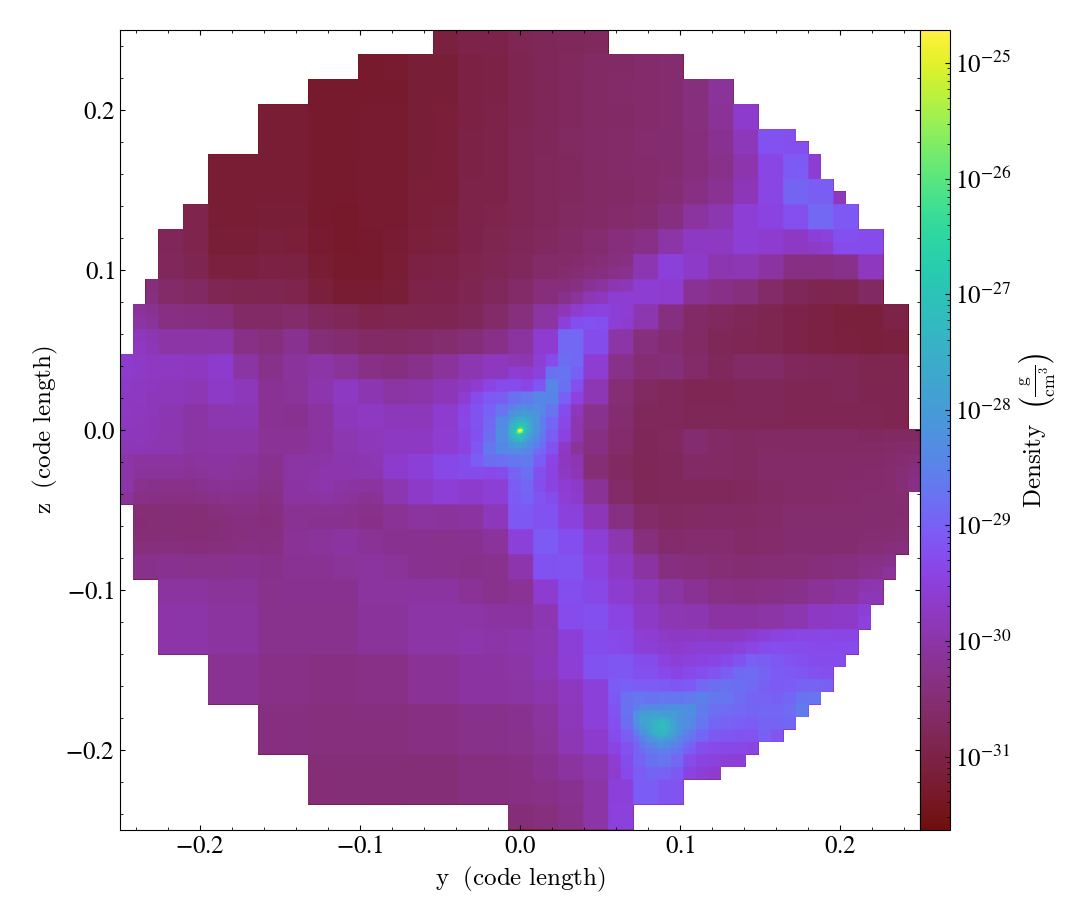

yt : [INFO     ] 2025-07-14 09:51:32,042 Saving plot figures/Plotting_00_01_DataSources_01.png


['figures/Plotting_00_01_DataSources_01.png']

In [1]:
import yt 

# ds = yt.load_sample("enzo_tiny_cosmology")
# or 
ds = yt.load("enzo_tiny_cosmology/DD0046/DD0046")

# find the location of the maximum value
field = ('gas', 'density')
ad = ds.all_data()
max_loc = ad.quantities.max_location(field)
max_loc, max_val = ds.arr(max_loc[1:]), max_loc[0]
print(f"maximum of {field} is at {max_loc}")

# build the sphere object
rad = ds.domain_width.min() / 4
sph = ds.sphere(max_loc, rad)

# create the slice plot
slc = yt.SlicePlot(ds, "x", field, 
                   center=max_loc, 
                   width=2 * rad, 
                   data_source=sph)

slc.show()
slc.save('figures/Plotting_00_01_DataSources_01.png')

## Exercise two: using cut regions to mask data ranges

cut regions (created with `ds.cut_region`) provide a way of conditionally selecting data based on values of a field. In this exercise, the goal is to plot the a field only where a condition is satisfied for another field. 

For example, try to create the following plot of density where temperature is above 1e5 K:

![](figures/Plotting_00_01_DataSources_02.png)

yt : [INFO     ] 2025-07-14 09:51:32,248 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:32,249 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:32,252 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:32,252 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:32,253 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



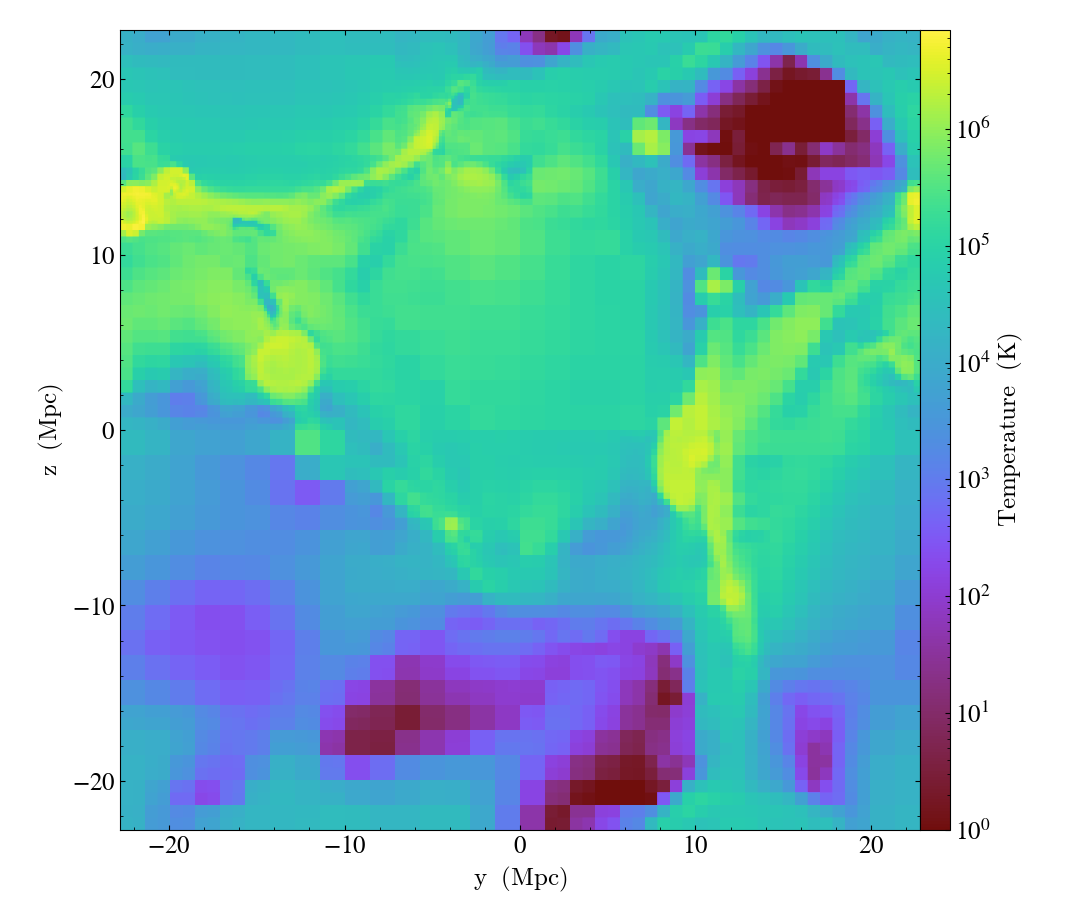

In [2]:
# first, create a slice plot to check out what the raw field looks like
# before we create a cut_region
yt.SlicePlot(ds, "x", ('gas', 'temperature'))

yt : [INFO     ] 2025-07-14 09:51:33,255 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:33,256 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:33,259 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:33,260 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-14 09:51:33,261 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2025-07-14 09:51:33,337 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


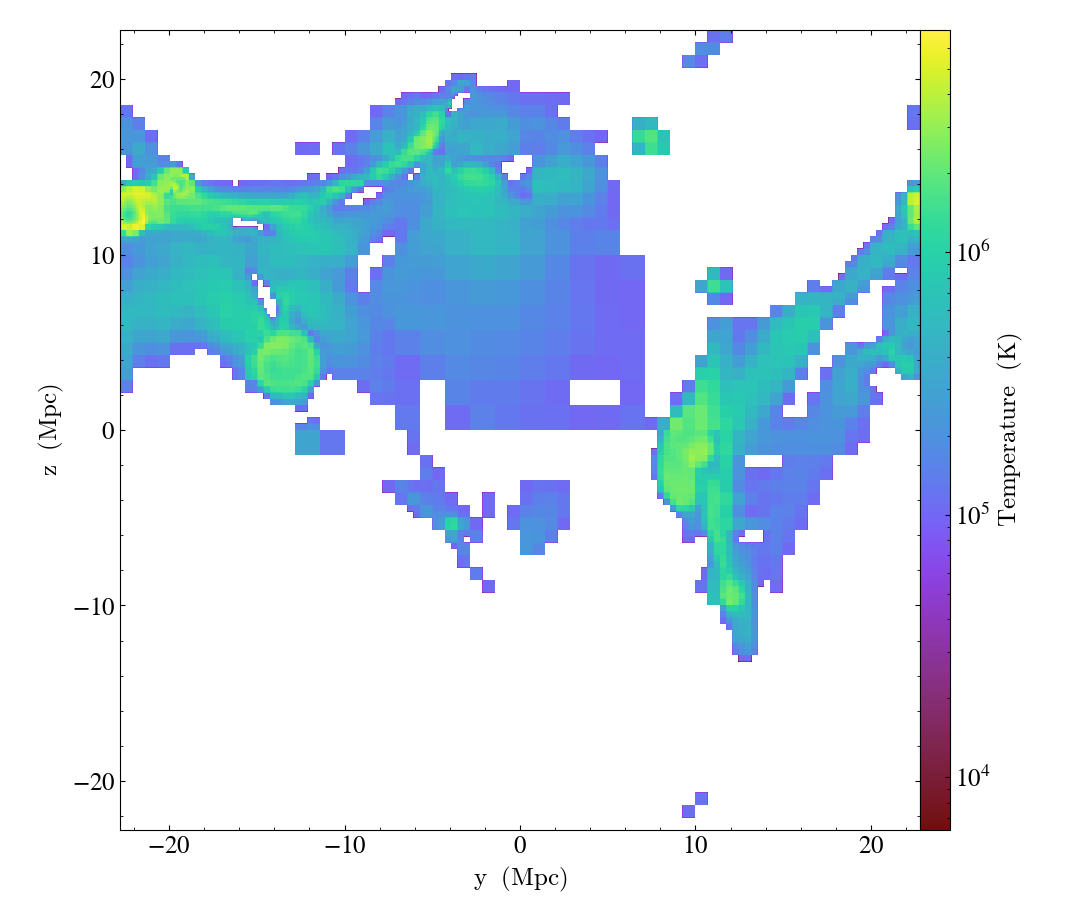

In [3]:
# create the cut_region
cutr_high = ds.cut_region(ds.all_data(), ["obj['gas', 'temperature'] > 1e5"])

# create two slices: temperature and density subject to the 
# cut region conditional
slices = yt.SlicePlot(ds, "x", 
                      [('gas', 'temperature'), ('gas', 'density')], 
                      data_source=cutr_high)

# display the temperature field just to check (you could recreate this plot 
# by instead adjusting the colormap limits)
slices[('gas', 'temperature')]

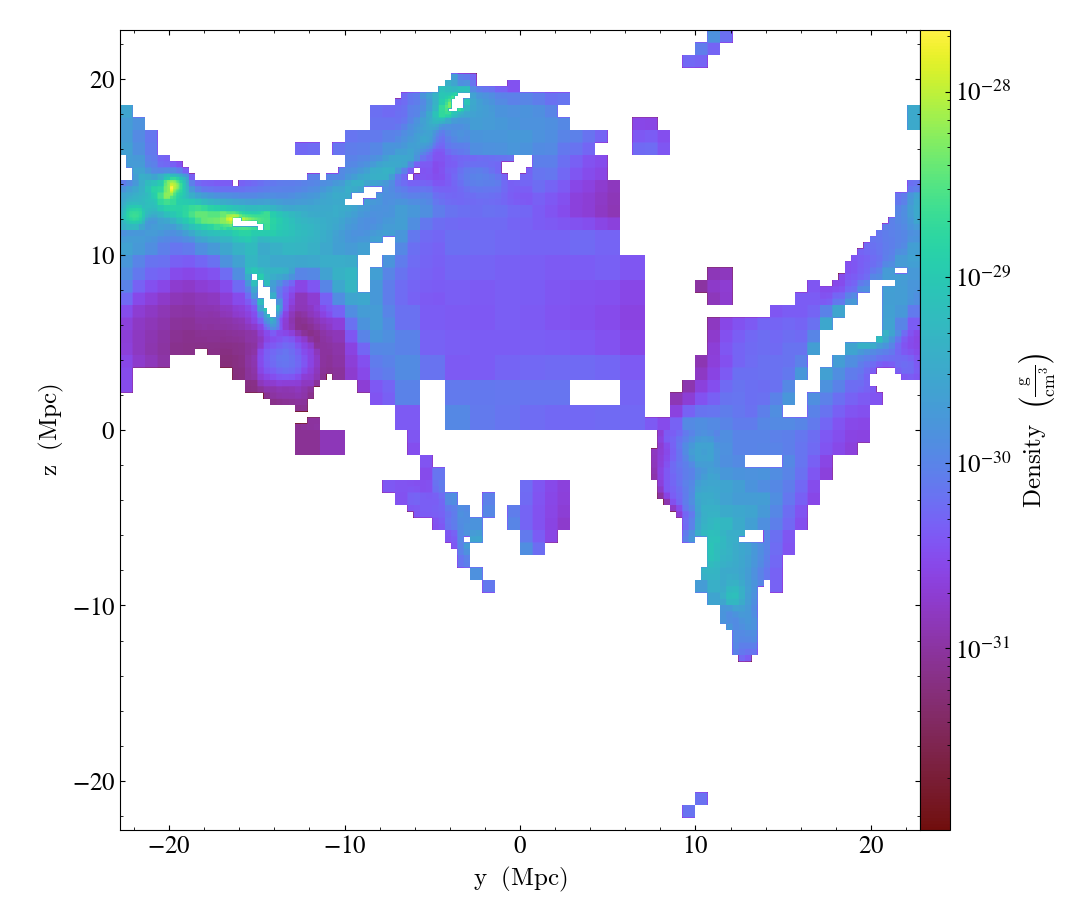

In [4]:
# display the density
slices[('gas', 'density')]

In [5]:
slices[('gas', 'density')].save('figures/Plotting_00_01_DataSources_02.png')

yt : [INFO     ] 2025-07-14 09:51:34,361 Saving plot figures/Plotting_00_01_DataSources_02.png


'figures/Plotting_00_01_DataSources_02.png'

## Exercise 3: combine the two plots 

Now, use `ds.bool` to combine the two plots above to, e.g., plot density within a spherical region where the temperature is above some cutoff. 

![](figures/Plotting_00_01_DataSources_03.png)

yt : [INFO     ] 2025-07-14 09:51:34,675 xlim = 0.413574 0.913574
yt : [INFO     ] 2025-07-14 09:51:34,677 ylim = 0.608887 1.108887
yt : [INFO     ] 2025-07-14 09:51:34,681 xlim = 0.413574 0.913574
yt : [INFO     ] 2025-07-14 09:51:34,682 ylim = 0.608887 1.108887
yt : [INFO     ] 2025-07-14 09:51:34,684 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



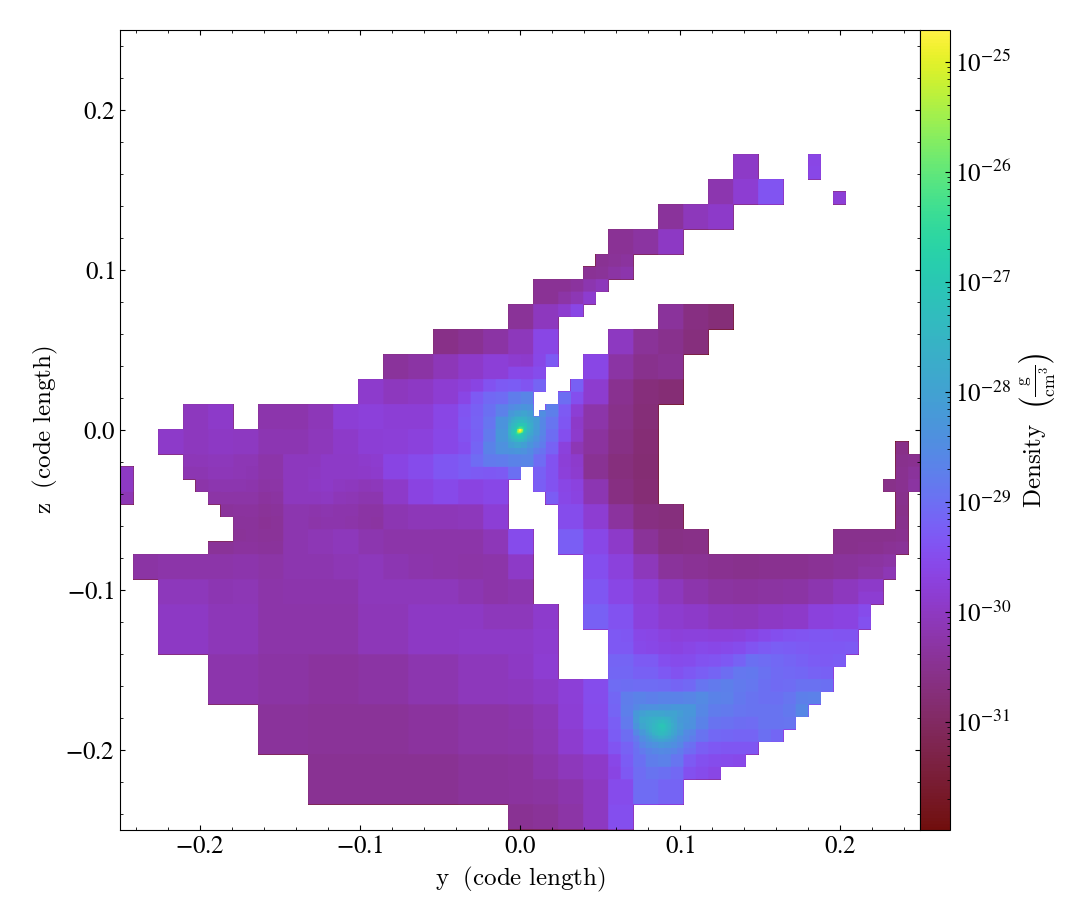

yt : [INFO     ] 2025-07-14 09:51:35,440 Saving plot figures/Plotting_00_01_DataSources_03.png


['figures/Plotting_00_01_DataSources_03.png']

In [6]:
# create a boolean combination of the two data objects
sph_cut = ds.bool('AND', cutr_high, sph)

# create the slice plot centered on the sphere using the new data object
slc = yt.SlicePlot(ds, "x", field, 
                   center=max_loc, 
                   width=2 * rad, 
                   data_source=sph_cut)

slc.show()
slc.save('figures/Plotting_00_01_DataSources_03.png')

## Corresponding PhasePlot

Finally, create a PhasePlot to check out the density-temperature-mass distribution within our combined data source, the result should look like:

![](figures/Plotting_00_01_DataSources_04.png)

yt : [INFO     ] 2025-07-14 09:51:36,105 Saving plot figures/Plotting_00_01_DataSources_04.png



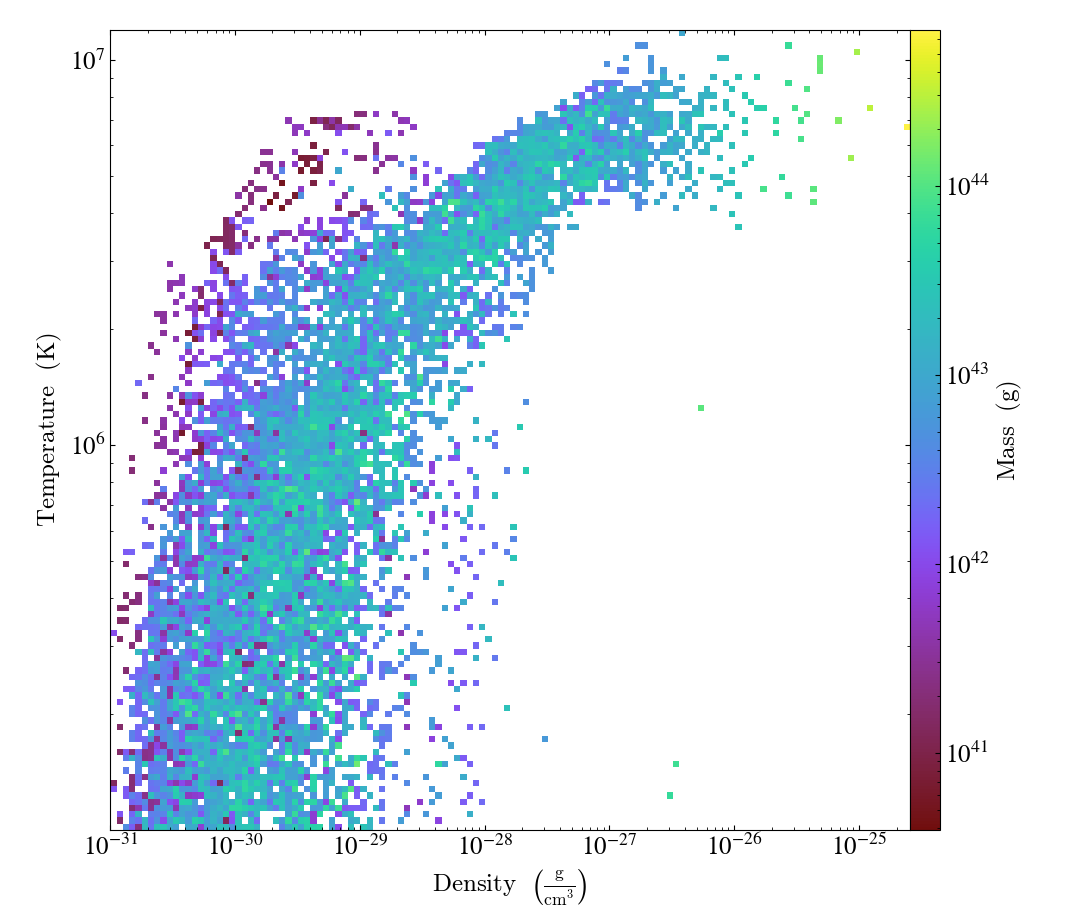

In [7]:
pp = yt.PhasePlot(sph_cut, 
                  ('gas', 'density'), 
                  ('gas', 'temperature'),  
                  [("gas", "mass")], 
                  weight_field=None)

pp.save('figures/Plotting_00_01_DataSources_04.png')
pp.show()